In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications.efficientnet import EfficientNetB0 as EfficientNet
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
img_height = 224
img_width = 224
batch_size = 256

In [3]:
test_directory = "/Users/andavaro/Desktop/Andrès/UBA/TrabajoDeGradoCEIA/dataset/Espectrogramas/multibalance_para_test/Copia de ns=32_sol=0.9_off_f=0-40"
test_ds= tf.keras.preprocessing.image_dataset_from_directory(
    test_directory, labels='inferred', label_mode='int', batch_size=batch_size, image_size=(img_height, img_width), seed=123)

Found 7957 files belonging to 3 classes.


In [4]:
ruta_modelos_entrenados = '/Volumes/SSD_ANDRÉS/Modelos entrenados'
new_model = tf.keras.models.load_model(ruta_modelos_entrenados+'/Inception_RegOpt_224_bs256NDO_L2000001L2000001_decay10epoc')
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   #print("Label: ",label_batch)
   y_true.append(label_batch)
   # compute predictions
   #print("Imagen: ",image_batch)
   preds = new_model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))
   #print("-----------------")

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 1s 833ms/step


In [5]:
class_names = test_ds.class_names
print(class_names)

['LP', 'VLP', 'VT']


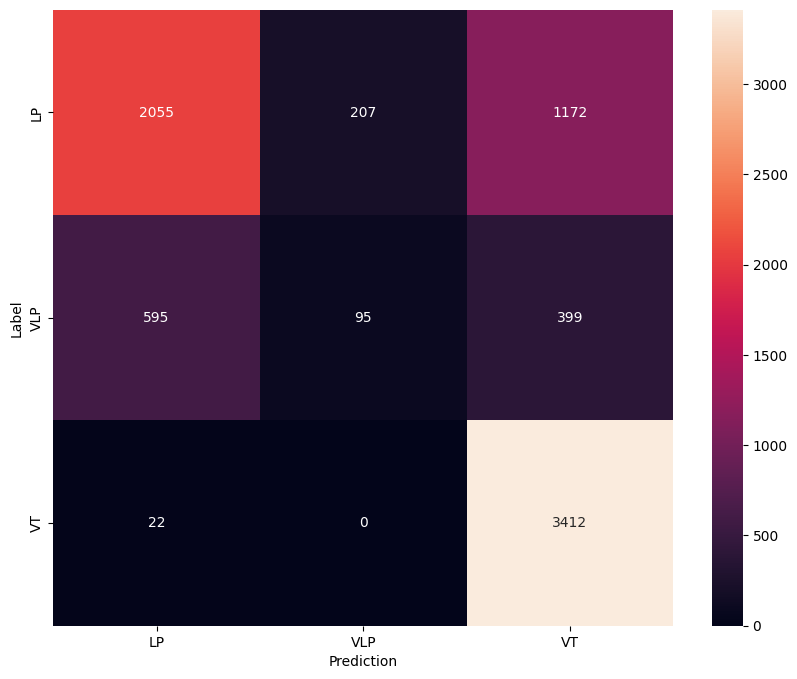

In [6]:
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(correct_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=class_names,
            yticklabels=class_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [7]:
cm = confusion_matrix(correct_labels, predicted_labels)
print('%LP: '+str(cm[0][0]/sum(cm[0]) * 100))
print(' %VLP: '+str(cm[1][1]/sum(cm[1]) * 100))
print('%VT: '+str(cm[2][2]/sum(cm[2]) * 100))

%LP: 59.842748980780435
 %VLP: 8.723599632690542
%VT: 99.35934769947583


In [8]:
from sklearn.metrics import classification_report
print(classification_report(correct_labels, predicted_labels, digits=4))

              precision    recall  f1-score   support

           0     0.7691    0.5984    0.6731      3434
           1     0.3146    0.0872    0.1366      1089
           2     0.6847    0.9936    0.8107      3434

    accuracy                         0.6990      7957
   macro avg     0.5895    0.5598    0.5401      7957
weighted avg     0.6705    0.6990    0.6591      7957

